In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import math
import seaborn as sns

## 1) Simple Linear Regression

### Read Data

In [4]:
salary = pd.read_csv('../../data/Salary_Data.csv')
print(salary.head())

### Plot Data

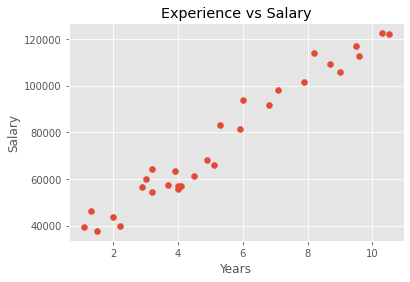

In [16]:
plt.scatter(salary['YearsExperience'], salary['Salary'])
plt.title('Experience vs Salary')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

### Correlation matrix

In [8]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Simple regression model

In [17]:
x_vals = salary['YearsExperience'].copy()
y_vals = salary['Salary'].copy()

simple_lin_model = sm.OLS(y_vals, sm.add_constant(x_vals)).fit()
print(simple_lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        15:01:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

### Predictions & Errors

In [18]:
#Predictions from model (y_hat)
y_preds = simple_lin_model.predict(sm.add_constant(x_vals))
y_preds

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0.5, 1.0, 'Actuals vs Predicted')

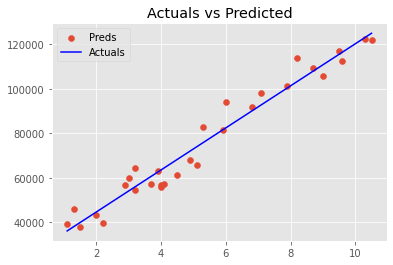

In [24]:
plt.scatter(salary['YearsExperience'], salary['Salary'])
plt.plot(salary['YearsExperience'], y_preds, color='blue')
plt.legend(['Preds', 'Actuals'])
plt.title('Actuals vs Predicted')

#### Sum of squared errors (SSE)

In [27]:
sse = (y_vals - y_preds)**2
sse = np.sum(sse)
sse

938128551.6684291

#### Sum of squared total (SST)

In [29]:
avg_y = np.mean(y_vals)
sst = (y_vals - avg_y) ** 2
sst = np.sum(sst)
sst

21794977852.0

#### Correlation Coefficient (R2)

In [30]:
r2 = 1 - sse/sst
r2

0.9569566641435086

## 2) Multiple Linear Regression

### Read Data

In [32]:
startups = pd.read_csv('../../data/50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Summary of data

In [35]:
startups.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


### Boxplot of all variables

New York      17
California    17
Florida       16
Name: State, dtype: int64


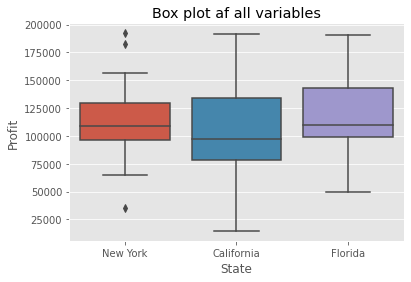

In [42]:
sns.boxplot(x='State', y='Profit', data=startups)
plt.title('Box plot af all variables')
plt.show()

In [43]:
startups['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Correlation of variables

In [44]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Dummy variables

In [47]:
startups = pd.get_dummies(startups, drop_first=True)
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### X, Y & train test split

In [49]:
X = startups.drop(['Profit'], axis=1).copy()
y = startups['Profit'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.shape)
print(X_test.shape)

(35, 5)
(15, 5)


### Multiple Regression Model

In [50]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [52]:
multiple_lin_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(multiple_lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           3.78e-18
Time:                        16:07:24   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             752.2
Df Residuals:                      29   BIC:                             761.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.24e+04   9364.122     

### Train test predictions

In [51]:
y_preds = regr.predict(X_test)
y_preds

array([104282.76472172, 132536.88499212, 133910.85007766,  72584.77489417,
       179920.9276189 , 114549.31079234,  66444.43261346,  98404.96840122,
       114499.82808602, 169367.50639895,  96522.6253998 ,  88040.6718287 ,
       110949.99405525,  90419.1897851 , 128020.46250064])

In [61]:
y_preds_train = multiple_lin_model.predict(sm.add_constant(X_train))
y_preds_train

7     160351.439513
14    150405.787507
45     47307.769280
48     44699.823812
29    102536.087501
15    145100.141824
30     98213.051083
32     97881.498149
16    115970.292723
42     68594.923793
20    115409.958629
43     59919.853040
8     152194.028040
13    127083.042370
25    102036.278655
5     161270.411187
17    130712.245758
40     74082.898789
49     47337.445197
1     189331.247951
12    128691.536399
37     84915.588141
24    110996.062933
6     157269.251694
23    108920.046013
36     75609.967674
21    118641.996004
19    115688.485430
9     152682.784975
39     80830.865892
46     56619.461808
3     172352.577315
0     192239.667879
47     46493.332729
44     65496.370311
dtype: float64

In [53]:
y_preds_new = multiple_lin_model.predict(sm.add_constant(X_test))
y_preds_new

28    104282.764722
11    132536.884993
10    133910.850078
41     72584.774893
2     179920.927620
27    114549.310791
38     66444.432612
31     98404.968401
22    114499.828085
4     169367.506400
33     96522.625399
35     88040.671828
26    110949.994056
34     90419.189784
18    128020.462500
dtype: float64

### Performance metrics function & results

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_preds)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_preds))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_preds)))

def get_errors (y, y_hat, exp_name):
  e = y - y_hat
  se = e ** 2
  mse = se.mean()
  rmse = math.sqrt(mse)
  ape = abs(e) / y
  mape = ape.mean()
  results = pd.DataFrame([[mse, rmse, mape]],
              columns = ['MSE', 'RMSE', 'MAPE'], 
              index=[exp_name]
            )
  return results

r2 socre is  0.9358680970046243
mean_sqrd_error is== 61903144.4023936
root_mean_squared error of is== 7867.8551335413895


In [62]:
get_errors(y_train, y_preds_train, 'train_results')

,MSE,RMSE,MAPE
train_results,8.962405e+07,9466.997853,0.125416


In [60]:
get_errors(y_test, y_preds_new, 'test_results')

,MSE,RMSE,MAPE
test_results,6.190314e+07,7867.855134,0.058237


### Plot of important variable and profit

### Model with only important variable